# Analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler



In [2]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(self.columns_,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    


# Linear Regression

In [3]:
pd.options.display.max_rows=None

In [4]:
data = pd.read_csv('train_1.csv')

data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_Members,Title,Cabin_Codes,Age_Group,Multiply,fare_per_person
0,1,0,3,male,22.0,1,0,7.2500,S,1,Mr,No_Cabin,3,66.0,3.62500
1,2,1,1,female,38.0,1,0,71.2833,C,1,Mr,C,3,38.0,35.64165
2,3,1,3,female,26.0,0,0,7.9250,S,0,Miss,No_Cabin,3,78.0,7.92500
3,4,1,1,female,35.0,1,0,53.1000,S,1,Mr,C,3,35.0,26.55000
4,5,0,3,male,35.0,0,0,8.0500,S,0,Mr,No_Cabin,3,105.0,8.05000


In [5]:
#data = data.sample(frac=1)

**For Getting equal no of classes**

In [6]:

"""
temp = data[(data['Survived'] == 0) ].iloc[:342,:]
temp2 = data[(data['Survived'] == 1) ]data.head()
data = pd.concat([temp,temp2]).sort_values(by='PassengerId')
data.head()
"""

"\ntemp = data[(data['Survived'] == 0) ].iloc[:342,:]\ntemp2 = data[(data['Survived'] == 1) ]data.head()\ndata = pd.concat([temp,temp2]).sort_values(by='PassengerId')\ndata.head()\n"

In [105]:

dataset = data.copy()


## Train And test Dataset

In [106]:
y = dataset['Survived']
print('All Columns : {}'.format(dataset.columns.values))
#cols_to_drop = ['Survived','PassengerId']
cols_to_drop = ['Survived','PassengerId','SibSp',  'Total_Members','Age','Age_Group']
cols_to_inc = list(set(dataset.columns) - set(cols_to_drop))
print(' Dropped Columns : {}'.format(cols_to_drop))

x = dataset.drop(cols_to_drop,axis=1)

#cat_columns = ['Age_Group','Cabin_Codes','Sex','Pclass','Title','Embarked']
cat_columns = ['Cabin_Codes','Sex','Pclass','Title','Embarked']
num_columns = list(set(x.columns)- set(cat_columns))
print('Cateogrical Columns : {} \n Numerical Columns : {}'.format(cat_columns,num_columns))
x.head()

All Columns : ['PassengerId' 'Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked' 'Total_Members' 'Title' 'Cabin_Codes' 'Age_Group' 'Multiply'
 'fare_per_person']
 Dropped Columns : ['Survived', 'PassengerId', 'SibSp', 'Total_Members', 'Age', 'Age_Group']
Cateogrical Columns : ['Cabin_Codes', 'Sex', 'Pclass', 'Title', 'Embarked'] 
 Numerical Columns : ['fare_per_person', 'Parch', 'Fare', 'Multiply']


,Pclass,Sex,Parch,Fare,Embarked,Title,Cabin_Codes,Multiply,fare_per_person
0,3,male,0,7.2500,S,Mr,No_Cabin,66.0,3.62500
1,1,female,0,71.2833,C,Mr,C,38.0,35.64165
2,3,female,0,7.9250,S,Miss,No_Cabin,78.0,7.92500
3,1,female,0,53.1000,S,Mr,C,35.0,26.55000
4,3,male,0,8.0500,S,Mr,No_Cabin,105.0,8.05000


In [107]:
encoder = CustomeOneHotEncoder(drop=True)
x = encoder.fit_transform(x,columns=cat_columns)
x.head()

,Parch,Fare,Multiply,fare_per_person,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
0,0,7.2500,66.0,3.62500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,71.2833,38.0,35.64165,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,7.9250,78.0,7.92500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,53.1000,35.0,26.55000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,8.0500,105.0,8.05000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [108]:
scaler = StandardScaler()
x[num_columns] = scaler.fit_transform(x[num_columns])
x.head()

,Parch,Fare,Multiply,fare_per_person,Cabin_Codes_B,Cabin_Codes_C,Cabin_Codes_D,Cabin_Codes_E,Cabin_Codes_F,Cabin_Codes_G,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Ms,Title_Rev,Embarked_Q,Embarked_S
0,-0.473674,-0.502445,0.116230,-0.454798,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.473674,0.786845,-0.780077,0.438994,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.473674,-0.488854,0.500361,-0.334757,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.473674,0.420730,-0.876110,0.185187,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.473674,-0.486337,1.364657,-0.331267,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,shuffle=True,random_state=1)

x_train.shape,x_test.shape


print('Test Shape : {} , Train Shape {}'.format(x_test.shape,x_train.shape))

Test Shape : (179, 31) , Train Shape (712, 31)


# Modelling

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

**SVM**

In [112]:
from sklearn.svm import SVC

In [157]:
#C=10,degree=2,kernel='poly'
model = SVC(C=18.2072922182224,degree=3,kernel='poly')
model = model.fit(x_train,y_train)
#print('Train Accuracy:', accuracy_score(y_train,res.predict(x_train)))
#print('Test Accuracy:', accuracy_score(y_test,res.predict(x_test)))

#print('Train Accuracy:' ,metrics.accuracy_score(y_train, res.predict(x_train)))
#print('Test Accuracy:' ,metrics.accuracy_score(y_test, res.predict(x_test)))


In [158]:
accuracy_score(y_train,model.predict(x_train))

0.8974719101123596

In [159]:
print('Train Accuracy:', accuracy_score(y_train,model.predict(x_train)))
print('Test Accuracy:', accuracy_score(y_test,model.predict(x_test)))

Train Accuracy: 0.8974719101123596
Test Accuracy: 0.770949720670391


In [160]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,f1_score,roc_auc_score

In [161]:
print('Accuracy  : %.2f'%accuracy_score(y_test,model.predict(x_test)))
print('Precision : %.2f'%precision_score(y_test,model.predict(x_test)))
print('Recall : %.2f'%recall_score(y_test,model.predict(x_test)))
print('F1 Score : %.2f'%f1_score(y_test,model.predict(x_test)))

Accuracy  : 0.77
Precision : 0.79
Recall : 0.60
F1 Score : 0.68


In [162]:
fpr,tpr,threshold = roc_curve(y_test,model.predict(x_test))

[Text(0, 0.5, 'True Positive Rate'), Text(0.5, 0, 'False Positive Rate')]

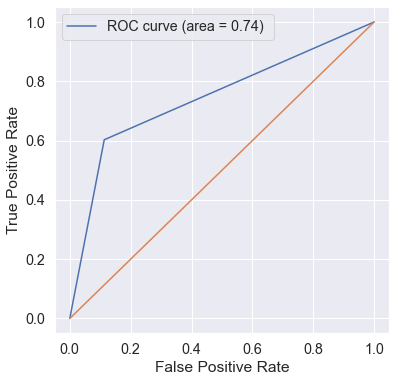

In [163]:

sns.set(rc={'figure.figsize':(6,6)},font_scale=1.3)
area = roc_auc_score(y_test,model.predict(x_test))
fig =sns.lineplot(fpr,tpr,label='ROC curve (area = {}) '.format(area.round(2)))
sns.lineplot([0,1],[0,1],markers='--')
fig.set(xlabel='False Positive Rate',ylabel='True Positive Rate')

**KFold Validation**

In [164]:
from sklearn.model_selection import KFold,cross_validate

In [165]:
cv = KFold(6,True,1)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [166]:
for train,test in cv.split(x):
    model.fit(x.iloc[train],y.iloc[train])
    print('Train acc :',model.score(x.iloc[train],y.iloc[train]))
    print('Test acc :',model.score(x.iloc[test],y.iloc[test]))

Train acc : 0.8935309973045822
Test acc : 0.7583892617449665
Train acc : 0.8854447439353099
Test acc : 0.7919463087248322
Train acc : 0.8800539083557951
Test acc : 0.7986577181208053
Train acc : 0.882907133243607
Test acc : 0.8581081081081081
Train acc : 0.873485868102288
Test acc : 0.8513513513513513
Train acc : 0.8761776581426649
Test acc : 0.8581081081081081


### Cross Validation

In [167]:
cv_score = cross_validate(model,x,y,cv=5,scoring='accuracy')['test_score']

In [168]:
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.8193083 | Std : 0.03610679 | Min : 0.7696629 | Max : 0.8651685


In [169]:
print("CV Score : Mean : %.7g | Std : %.7g | Min : %.7g | Max : %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

CV Score : Mean : 0.8193083 | Std : 0.03610679 | Min : 0.7696629 | Max : 0.8651685


### Grid Search, Randomized Search

In [146]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [127]:
#, 'rbf', 'poly'
parameters = {'kernel' : ['poly','rbf','linear'],
              'degree' : [1,2,3,4,5,6],
             'C':[0.001,0.01,0.05,0.1,10,100,1000]}


In [128]:
cv_model = GridSearchCV(model,parameters,verbose=1,cv=5,scoring='accuracy',n_jobs=5)
cv_model.fit(x,y)


Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  70 tasks      | elapsed:    1.1s
[Parallel(n_jobs=5)]: Done 201 out of 210 | elapsed:   27.9s remaining:    1.2s
[Parallel(n_jobs=5)]: Done 210 out of 210 | elapsed:   36.9s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.001, 0.01, 0.05, 0.1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5, 6], 'kernel': ['poly']},
             scoring='accuracy', verbose=1)

In [129]:
cv_model.best_params_,cv_model.best_score_

({'C': 10, 'degree': 3, 'kernel': 'poly'}, 0.8215554579122465)

### Randomized Search

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
from scipy.stats import uniform
C = uniform(0,1000)
parameters = {'C':C,
             'kernel' : ['poly','rbf','linear'],
              'degree' : [1,2,3,4,5,6]}


In [155]:
cv_model = RandomizedSearchCV(model,parameters,cv=7,scoring='accuracy',n_jobs=5,verbose=1)
cv_model.fit(x,y)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  54 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done  61 out of  70 | elapsed:  2.5min remaining:   21.9s
[Parallel(n_jobs=5)]: Done  70 out of  70 | elapsed:  4.3min finished


RandomizedSearchCV(cv=7, estimator=SVC(), n_jobs=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027785E302C8>,
                                        'degree': [1, 2, 3, 4, 5, 6],
                                        'kernel': ['poly', 'rbf', 'linear']},
                   scoring='accuracy', verbose=1)

In [156]:
cv_model.best_params_,cv_model.best_score_

({'C': 18.20729221822248, 'degree': 3, 'kernel': 'poly'}, 0.8260949803149608)

## Create Submission

In [ ]:
test_data = pd.read_csv('test_1.csv')
test_data = test_data.sample(frac=1)
passenger_id = test_data.PassengerId
test_data = test_data.drop(cols_to_drop[1:],axis=1)
test_data.head()

In [ ]:
test_data = encoder.transform(test_data)
test_data.head()

In [ ]:
test_data[num_columns] = scaler.fit_transform(test_data[num_columns])
#test_data = test_data.iloc[:,1:]
test_data.head()

In [ ]:
result = pd.DataFrame({
                        'PassengerId': passenger_id,
                        'Survived': model.predict(test_data)
                        })
result = result.sort_values(by='PassengerId')

In [ ]:
sns.countplot(result['Survived'])

In [ ]:
result.shape

In [ ]:
result.to_csv('Prediction_21.csv',index=False)